# Analyse de données de chronographe

## Résumé pratique

Supposons que nous avons un échantillon de $n$ valeurs, notées $x_1,\ldots,x_n$. La moyenne empirique est
$$
\hat{\mu} = \frac{1}{n} \sum_{i = 1}^n x_i,
$$
et l'écart-type empirique est
$$
\hat{\sigma} = \sqrt{\frac{1}{n-1} \sum_{i = 1}^n (x_i - \hat{\mu})^2}.
$$
Si le mesure de moyenne est en général assez fiable, l'évaluation de l'écart-type comporte toujours un bruit important, et l'information de l'écart-type est avant tout qualitative, plus que quantitative.

## Explications mathématiques

Les preuves sont omises dans les résultats donnés ci-dessous, pour se concentrer sur des considérations pratiques. Le lecteur désirant en connaître davantage pourra par exemple consulter https://bookdown.org/egarpor/inference/

In [1]:
using Distributions
using Plots

## La distribution normale

Nous supposerons à fins d'illustrations que la vitesse initiale suit une distribution normale de moyenne 850$m/s$ et d'écart-type 3,5$m/s$, ce qui en Julia peut s'écrire comme

In [2]:
vitesse = Normal(850,3.5)

Normal{Float64}(μ=850.0, σ=3.5)

In [3]:
pdfvitesse(x) = pdf(vitesse, x)

pdfvitesse (generic function with 1 method)

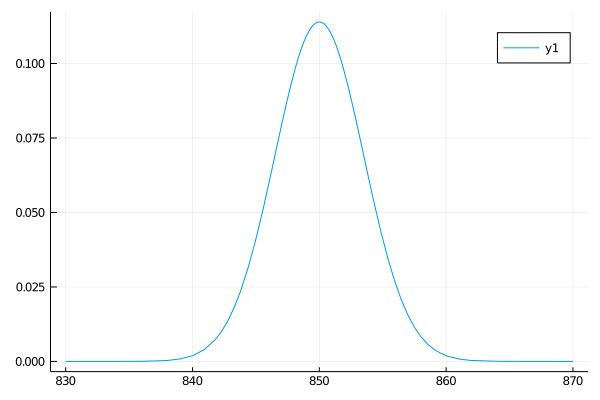

In [4]:
plot(pdfvitesse, 830, 870)

Le graphe correspond à la célèbre courbe en cloche célébrée en probabilité.

## Moyenne et écart-type

### Moyenne

La notion de moyenne est assez intuitive, puisque c'est la valeur centrale des observations. Supposons que nous avons $n$ mesures $x_1,\ldots,x_n$, la moyenne échantillonnale vaut
$$
\hat{\mu} = \frac{1}{n} \sum_{i = 1}^n x_i.
$$
La loi des grands nombres nous apprend que quand $n$ tends vers l'infini, $\hat{\mu}$ converge vers l'espérance de la distribution $\mu = E[X]$, en supposant que toutes les observations sont issues de la même distribution. Mathématiquement parlant, il faut cependant que cette espérance existe, ce qui est le cas pour la quasi totalité des distributions statistiques, et la convergence se fait en probabilité (loi faible des grands nombres) ou presque sûrement (loi forte des grands nombres). Nous pouvons cependant ignorer ces détails mathématiques dans ce qui suit.

Si asymptotiquement, le moyenne est normalement distribuée en vertu du théorème de la limite centrale, les points mesurés peuvent venir d'une autre distribution. Utiliser l'écart-type pour déterminé la proportion de points autour d'une valeur donnée requiert donc l'hypothèse que ceux-ci proviennent d'une loi normale.

Supposons que c'est le cas et simulons des mesures de vitesse avec la distribution préalablement créée. Nous allons générer 10000 mesures, ce qui est bien sûr irréaliste mais permettra de discuter du calcul de l'écart-type.

In [5]:
mesures = rand(vitesse, 10000)

10000-element Array{Float64,1}:
 847.3966896535768
 853.4978500648765
 851.8050159725839
 855.3037807917756
 848.3089946817807
 850.5937444439896
 849.7474643439017
 854.111312890382
 846.1611788706209
 851.5174375519952
 850.7979624222581
 849.7186780904785
 854.0118730866612
   ⋮
 850.2271265797898
 850.3125314934834
 849.4356804319569
 854.6304632874107
 845.8486268113496
 853.6052469092479
 855.0484496651043
 854.0780427360995
 848.2556763230799
 851.9032200330686
 850.9682259815521
 854.0714906927286

Remarquons que la moyenne et l'écart-type de l'échantillon correspondent bien approximativement, mais pas parfaitement, à nos hypothèses de départ:

In [6]:
μ = mean(mesures)
σ = std(mesures)
μ, σ 

(850.0451939191934, 3.5198107731041293)

Regardons à présent l'évolution des moyennes et écart-type empirique en partant de 3 observations jusqu'à 10000. L'analyse est bien entendu idéalisée puisqu'on suppose les mesures parfaites, ce qui ne sera jamais le cas en pratique.

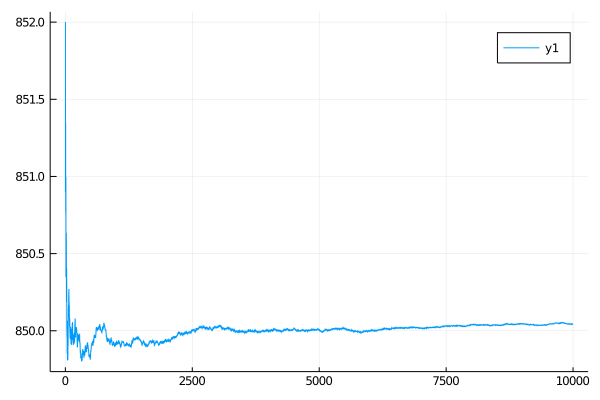

In [7]:
moyennes = [ mean(mesures[1:i]) for i = 3:10000 ]
ecarttypes = [ std(mesures[1:i]) for i = 3:10000 ]

plot(moyennes)

Nous constatons que nous avons rapidement une bonne estimation de la vitesse moyenne. Il en est tout autre pour l'écart-type.

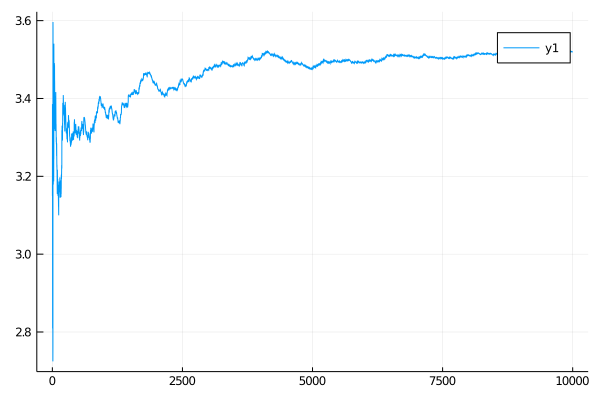

In [8]:
plot(ecarttypes)

Si nous nous intéressons seulement aux 50 premières observations, nos avons le graphe suivant.

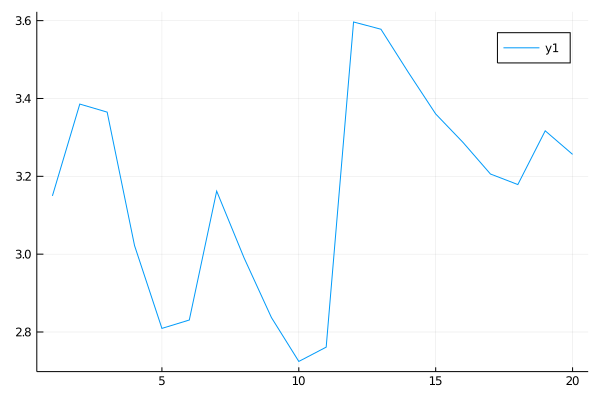

In [9]:
plot(ecarttypes[1:20])

Nous voyons que l'estimateur d'écart-type converge lentement vers la vraie valeur, et il convient de ne pas prendre les valeurs estimées comme précises (alors que l'expérience est idéalisée!). Remarquons que l'application de la formule initiale sur trois observations donne bien la valeur obtenue avec la fonction std:

In [10]:
x=(mesures[1]+mesures[2]+mesures[3])/3
y=(mesures[1]^2+mesures[2]^2+mesures[3]^2)/3
sqrt((y-x^2)*3/2)

3.1496874596894537

De plus, si nous prenons 20 autres observations, le comportement est tout autre:

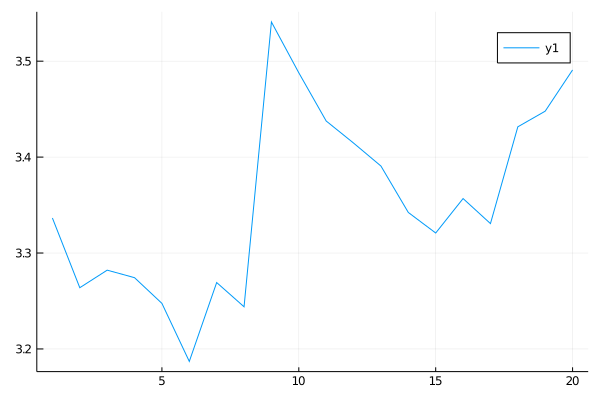

In [11]:
plot(ecarttypes[21:40])

## Intervales de confiance

Si les mesures sont indépendantes et identiquement distribuées (i.i.d.), il est possible de construire un intervalle contenant avec une probabilité donnée la valeur recherchée.

Le théorème de la limite centrale nous informe qu'asymptotiquement
$$
P \left[ \mu \in \left[{\hat {\mu }}-|z_{\alpha /2}|{\frac {1}{\sqrt {n}}}\hat{\sigma},{\hat {\mu }}+|z_{\alpha /2}|{\frac {1}{\sqrt {n}}} \hat{\sigma} \right] \right] \rightarrow 1 - \alpha,
$$
où $\alpha$ est le niveau auquel l'intervalle de confiance est construit. Des choix typiques sont $\alpha = 0.05$ ou $\alpha = 0.1$, donnant des probabilités respectives de 95% et 90%.
$$
P \left[ \sigma^{2} \in \left[\hat{\sigma}^{2}-|z_{\alpha /2}|{\frac {\sqrt{2}}{\sqrt {n}}}\hat{\sigma}^{2},
\hat{\sigma}^{2}+|z_{\alpha /2}|{\frac {\sqrt{2}}{\sqrt {n}}}\hat{\sigma}^{2}\right] \right]  \rightarrow 1 - \alpha
$$

Dans le cas où les observations sont i.i.d. et normalement distribuées, nous pouvons remplacer les intervalles de confiance asymptotiques par des intervalles exacts commme suit:

$$
P \left[ \mu \in \left[{\hat {\mu }}-t_{n-1,1-\alpha /2}{\frac {1}{\sqrt {n}}}\hat{\sigma},{\hat {\mu }}+t_{n-1,1-\alpha /2}{\frac {1}{\sqrt {n}}}\hat{\sigma}\right] \right] = 1 - \alpha
$$
$$
P \left[ \sigma ^{2} \in \left[{\frac {(n-1)\hat{\sigma}^{2}}{\chi_{n-1,1-\alpha /2}^{2}}},{\frac {(n-1)\hat{\sigma}^{2}}{\chi_{n-1,\alpha /2}^{2}}} \right] \right] = 1 - \alpha
$$
où $\chi^2_{n-1}$ désigne la loi chi-carré à $n-1$ degrés de liberté.

Reprenons les données que nous avons générées, en se rappelant que les hypothèses de normalité étaient respectées, et par conséquent, nous pouvons utiliser les dernières formules.

Considérons 20 observations et posons tout d'abord $\alpha$ à 0,05, autrement dit, nous construisons un intervalle de confiance à 95%.

In [13]:
n = 20

S = TDist(n-1)
χ = Chisq(n-1)

α = 0.05

Δμ = quantile(S, 1-α/2)*ecarttypes[n-2]/sqrt(n)
μinf = moyennes[n]-Δμ
μsup = moyennes[n]+Δμ
σinf = sqrt((n-1)ecarttypes[n-2]^2/quantile(χ, 1-α/2))
σsup = sqrt((n-1)ecarttypes[n-2]^2/quantile(χ, α/2))

μinf, μsup

(849.0715392143729, 852.0470069817372)

L'intervalle de confiance obtenu pour la variance est

In [14]:
σinf, σsup

(2.4174626087133277, 4.642895352776656)

L'intervalle comprend bien la véritable valeur de 3,5 m/s, mais la borne supérieur est de 4,64 m/s! Autrement dit, sur base des 20 observations uniquement, il est très difficile de s'assurer que l'écart-type est sous la barre des 3,5 m/s. La mesure d'écart-type est par ailleurs

In [15]:
ecarttypes[n-2]

3.178820701402201

ce qui dans le cas présent est une sous-estimation du véritable écart-type, contribuant à limiter la borne supérieure.

In [17]:
α = 0.1

Δμ = quantile(S, 1-α/2)*ecarttypes[n+2]/sqrt(n)
μinf = moyennes[n-2]-Δμ
μsup = moyennes[n-2]+Δμ
σinf = sqrt((n-1)ecarttypes[n-2]^2/quantile(χ, 1-α/2))
σsup = sqrt((n-1)ecarttypes[n-2]^2/quantile(χ, α/2))

σinf, σsup

(2.523746899476458, 4.356288941569104)

L'imprécision sur l'écart-type est encore très grande.

Refaisons la même expérience, mais avec un écart-type réel de 3 m/s.

In [18]:
vitesse = Normal(850,3.0)
mesures = rand(vitesse, 10000)
μ = mean(mesures)
σ = std(mesures)
moyennes = [ mean(mesures[1:i]) for i = 3:10000 ]
ecarttypes = [ std(mesures[1:i]) for i = 3:10000 ]
μ, σ

(850.0062109394171, 2.992841357828554)

In [19]:
α = 0.1

Δμ = quantile(S, 1-α/2)*ecarttypes[n-2]/sqrt(n)
μinf = moyennes[n-2]-Δμ
μsup = moyennes[n-2]+Δμ
σinf = sqrt((n-1)ecarttypes[n-2]^2/quantile(χ, 1-α/2))
σsup = sqrt((n-1)ecarttypes[n-2]^2/quantile(χ, α/2))

σinf, σsup

(2.5174333725927505, 4.345391039187729)

On voit que l'imprécision rapportée par l'intervalle de confiance reste importante, et la borne supérieure plus grande que 3,5 m/s. Diminuons l'écart-type à 2,5 m/s.

In [21]:
vitesse = Normal(850,2.5)
mesures = rand(vitesse, 10000)
μ = mean(mesures)
σ = std(mesures)
moyennes = [ mean(mesures[1:i]) for i = 3:10000 ]
ecarttypes = [ std(mesures[1:i]) for i = 3:10000 ]
μ, σ

(849.9901978100751, 2.4852736272869853)

In [22]:
α = 0.1

Δμ = quantile(S, 1-α/2)*ecarttypes[n-2]/sqrt(n)
μinf = moyennes[n-2]-Δμ
μsup = moyennes[n-2]+Δμ
σinf = sqrt((n-1)ecarttypes[n-2]^2/quantile(χ, 1-α/2))
σsup = sqrt((n-1)ecarttypes[n-2]^2/quantile(χ, α/2))

σinf, σsup

(1.8478060098412121, 3.189534136131503)

À présent, nous pouvons confortablement assurer que l'écart-type est sous les 3,5 m/s, mais uniquement car l'écart-type réel est bien inférieur à la valeur fatidique.

## Conclusion

L'estimation statistique est un art en soi, et la qualité des estimateurs dépend de la quantité que nous cherchons à mesurer. L'estimation d'écart-type demeure délicate, et les valeurs doivent être considérées avec l'imprécision qui les entoure.